# Monte Carlo Simulation for a Package/ courier delivery service system



### Idea behind our project proposal :-


#### Over the years it has been seen that the most package delivery companies cancel or suspend their service due to extreme weather
#### The reason for them to do so is because of the employees life being at great risk
#### We are prosposing a model to mitigate this risk 


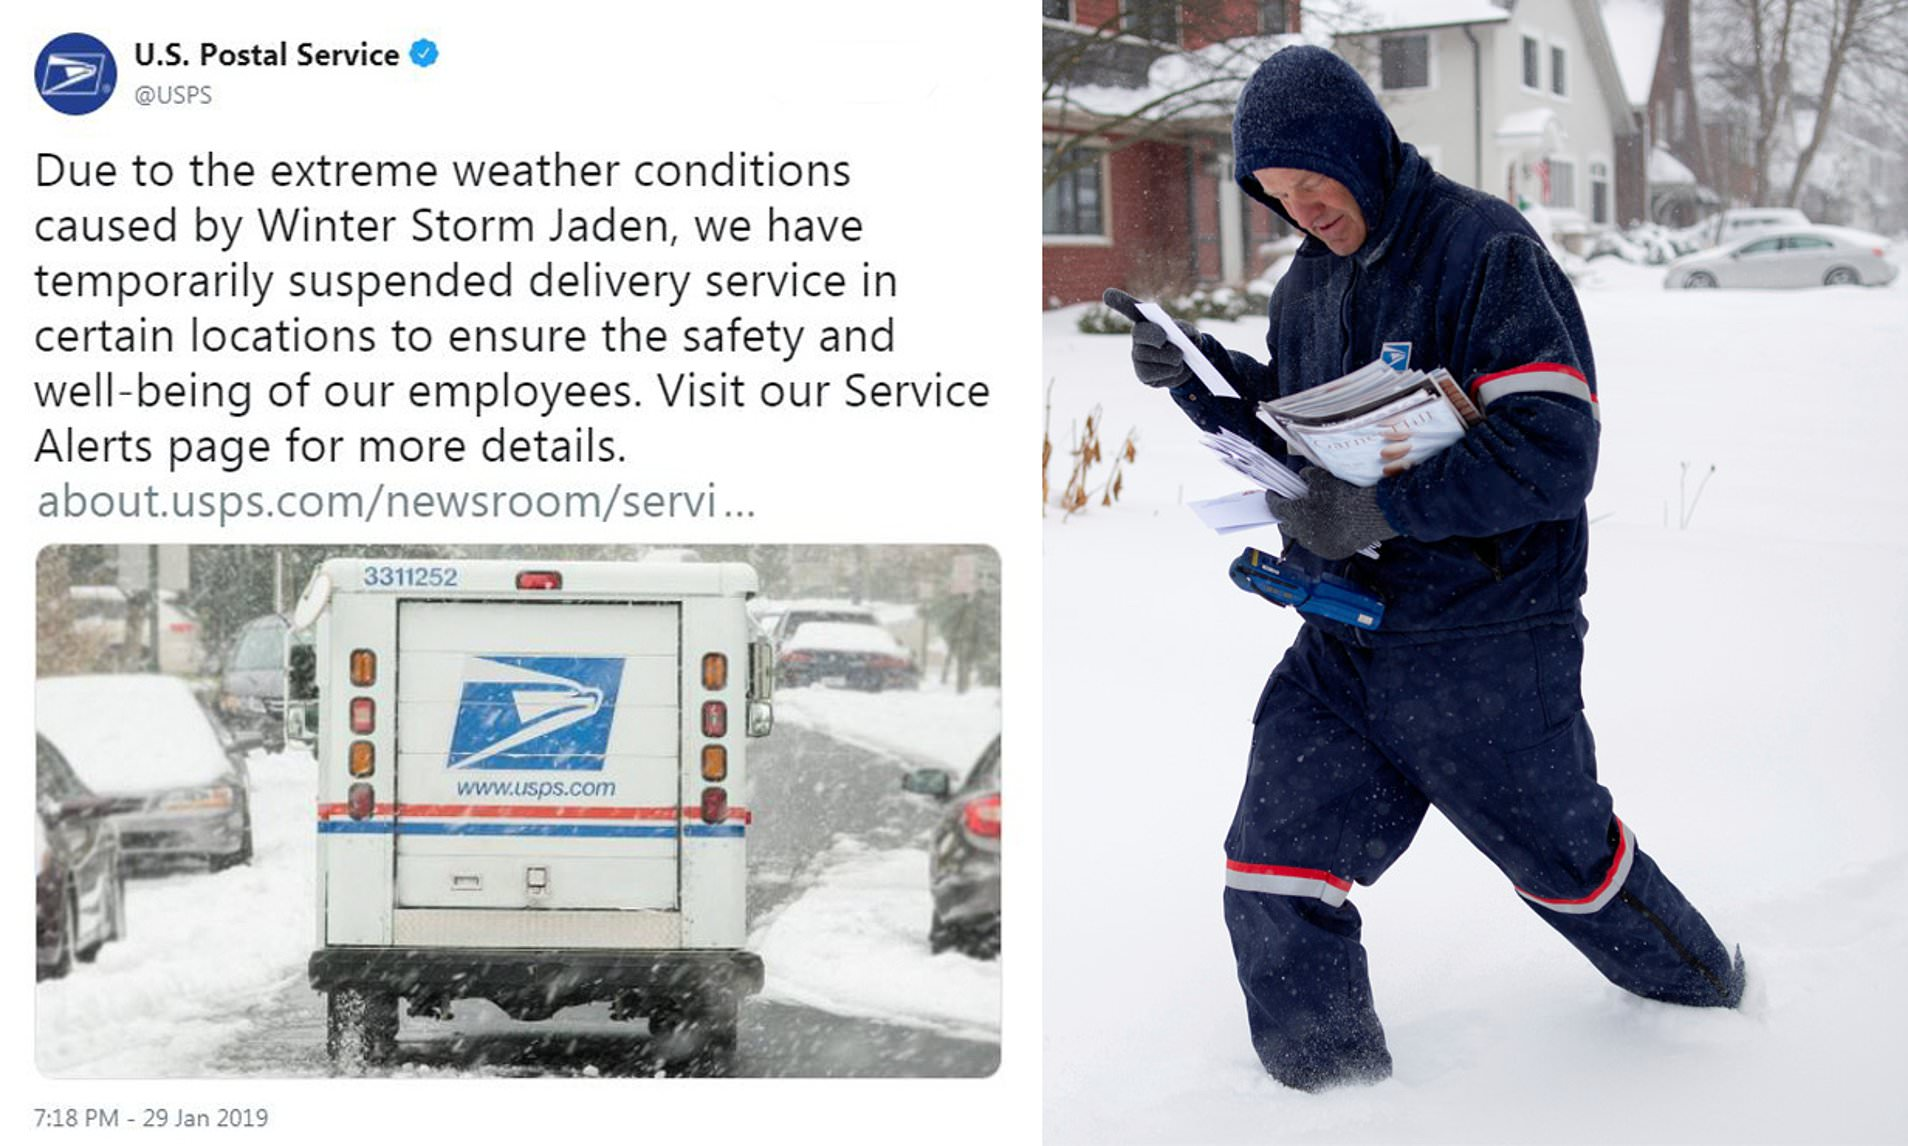

In [88]:
from IPython.display import Image
Image(filename='download3.jpg')

### Our Proposals :-
#### We have two proposals to solve this problem
## Project Proposal 1 :-
### Drone Package Delivery System
#### We belive that in order to mitigate the human risk, the use of drones can be used to deliver the packages accordingly.
#### Pilot experiments regarding the same have been performed by companies like Amazon, DHL, EasyJet and many more.
#### With the advancement of technology, using Drones for package delivery can be possible.

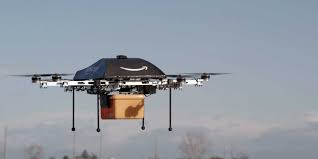

In [89]:
Image(filename='download-2.jpg')

## Project Proposal 2 :-
### Self-Driving Cars to deliver Packages
#### We belive that in order to mitigate the human risk, the use of Self-Driving Cars can be used to deliver the packages accordingly.
#### A similar idea has been implemented where self-driving cars have been used to deliver groceries in Texas.
#### We are aware that Self-driving cars are expensive and don't have optimum accuracy when it comes to extreme weather but 
#### With the advancement of technology, using Self-driving cars for package delivery can be possible.

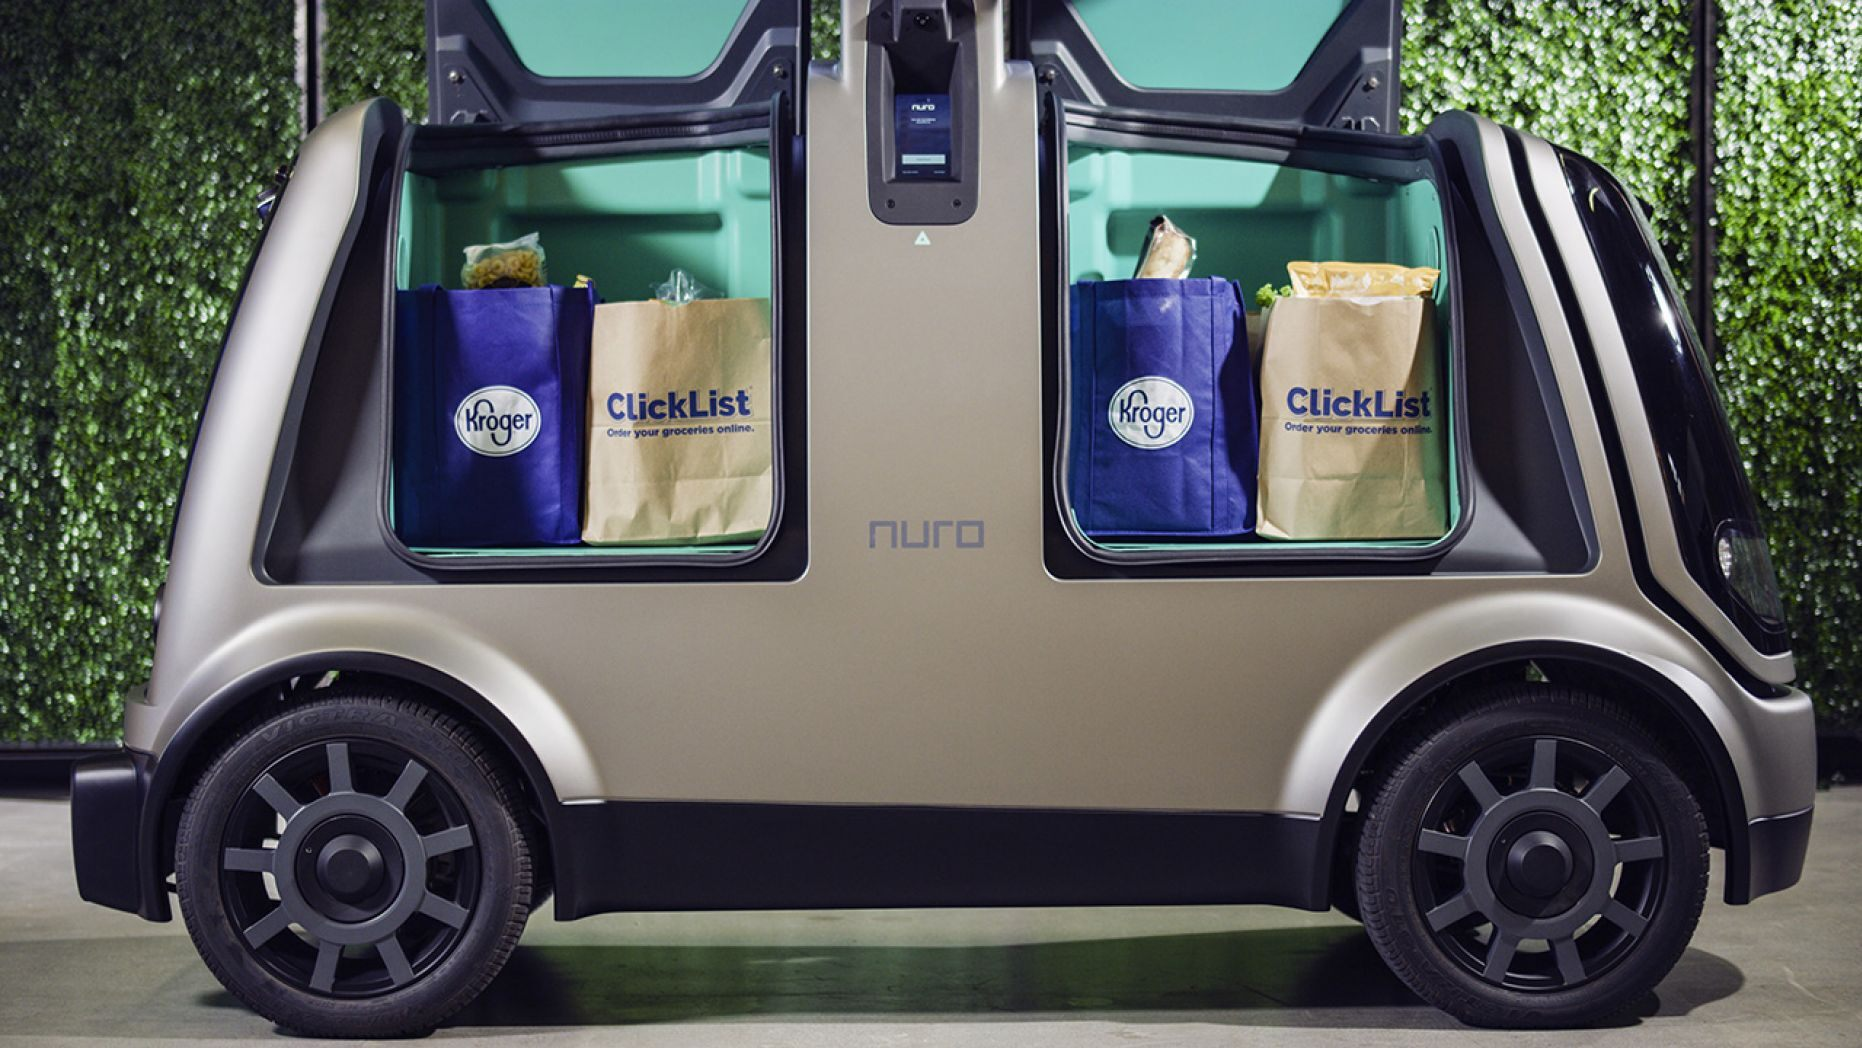

In [90]:
Image(filename='nuro-kroger.jpg')

## Code
### Hypothesis 1 :-
#### There is a relation between the number of workers and the time it takes to load and unload the packages
#### More number of workers will result in lesser loading/ Unloading time
#### Less number of workers will take more loading/ Unloading time

In [91]:
import numpy as np
import pandas as pd
import math
import requests
import random
import sys
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go

#dimesions of 1kg, 5kg, 10kg, 20 kg box in centimeters
Dimensions_of_all_size_boxes_cm={"1kg":[33.7,18.2,10],"5kg":[33.7,33.2,18],"10kg":[40.16,32.86,25.88],"20kg":[48.1,40.4,38.9]}

#dimsions of the cargo carrier in inches
cargo_carrier_dimensions_inch=[126,77.5,76]

#converting the dimensions of the cargo carrier from inches to centimeter
cargo_carrier_dimensions_cm=[(lambda x: x*2.54)(x) for x in cargo_carrier_dimensions_inch]

### Function for cost and volume check

In [92]:
def volume_check(Number_of_1_Kg_Parcels,Number_of_5_Kg_Parcels,Number_of_10_Kg_Parcels,Number_of_20_Kg_Parcels,Dimensions_of_all_size_boxes_cm,cargo_carrier_dimensions_cm):
    """Checks if the boxes of different sizes i.e 1kg,5kg,10kg,20kg can be accomodated in the cargo carrier
    
    :param Number_of_1_Kg_Parcels: Number of 1kg boxes 
    :param Number_of_1_Kg_Parcels: Number of 5kg boxes
    :param Number_of_1_Kg_Parcels: Number of 10kg boxes
    :param Number_of_1_Kg_Parcels: Number of 20kg boxes 
    :param Dimensions_of_all_size_boxes_cm: dictionary containing dimentions of 1,5,10,20kg boxes in centimeters
    :param cargo_carrier_dimensions_cm: dimensions of the cargo in centimeter
    
    :returns: Boolean value, true if it can be accomodated and false if it cannot be accomodated
    >>> volume_check(0,0,0,1,{"1kg":[1,1,1],"5kg":[1,1,1],"10kg":[1,1,1],"20kg":[98,99,99]},[100,100,100])
    True
    
    >>> volume_check(0,0,0,1,{"1kg":[1,1,1],"5kg":[1,1,1],"10kg":[1,1,1],"20kg":[50,45,30]},[100,100,100])
    False
    """
    boolean_x=True
    
    volume_1_kg=np.prod(Dimensions_of_all_size_boxes_cm["1kg"])*Number_of_1_Kg_Parcels
    volume_5_kg=np.prod(Dimensions_of_all_size_boxes_cm["5kg"])*Number_of_5_Kg_Parcels
    volume_10_kg= np.prod(Dimensions_of_all_size_boxes_cm["10kg"])*Number_of_10_Kg_Parcels
    volume_20_kg= np.prod(Dimensions_of_all_size_boxes_cm["20kg"])*Number_of_20_Kg_Parcels
    volume_cargo_carrier= np.prod(cargo_carrier_dimensions_cm)

    
    if (volume_1_kg+volume_5_kg+volume_10_kg+volume_20_kg)<= (volume_cargo_carrier*0.95) or (volume_1_kg+volume_5_kg+volume_10_kg+volume_20_kg) >=volume_cargo_carrier:
        boolean_x=False
    return boolean_x

### Random Sampling

In [93]:
def random_sampling(cargo_carrier_dimensions_cm,Dimensions_of_all_size_boxes_cm):
    """
    This function is responsible for generating random number of boxes for each size 
    i.e 1kg,5kg,10kg and 20kg by using the random.randint function
    if the number of boxes cannot be accomodated by the cargo carrier then function is recalled
    It returns valid number of different size boxes that can be accomodated
    
    :param cargo_carrier_dimensions_cm: dimensions of the cargo in centimeter
    :param Dimensions_of_all_size_boxes_cm: dictionary containing dimentions of 1,5,10,20kg boxes in centimeters
    :returns: Number of 1,5,10,20 kg boxes
    
    >>> (100,100,100,100)>= random_sampling([150,150,150],{"1kg":[5,5,5],"5kg":[15,15,15],"10kg":[25,25,25],"20kg":[35,35,35]}) >= (0,0,0,0)
    True
    >>> random_sampling([150,150,150],{"1kg":[5,5,5],"5kg":[15,15,15],"10kg":[25,25,25],"20kg":[35,35,35]}) < (0,0,0,0)
    False
    """
    Number_of_1_Kg_Parcels=random.randint(0,100)
    Number_of_5_Kg_Parcels=random.randint(0,100)
    Number_of_10_Kg_Parcels=random.randint(0,100)
    Number_of_20_Kg_Parcels=random.randint(0,100)
    
    
    if volume_check(Number_of_1_Kg_Parcels,Number_of_5_Kg_Parcels,Number_of_10_Kg_Parcels,Number_of_20_Kg_Parcels,Dimensions_of_all_size_boxes_cm,cargo_carrier_dimensions_cm):
        return Number_of_1_Kg_Parcels,Number_of_5_Kg_Parcels,Number_of_10_Kg_Parcels,Number_of_20_Kg_Parcels
    else:
        return random_sampling(cargo_carrier_dimensions_cm,Dimensions_of_all_size_boxes_cm)

### Loading and unloading time calculation

In [94]:
def load_unloading_time_calculation(Number_of_1_Kg_Parcels,Number_of_5_Kg_Parcels,Number_of_10_Kg_Parcels,Number_of_20_Kg_Parcels):
    """ This function calculates the loading and unloading time 
    it takes the workers to load/unload the packages in the cargo carrier
    :param Number_of_1_Kg_Parcels: Number of 1kg boxes 
    :param Number_of_1_Kg_Parcels: Number of 5kg boxes
    :param Number_of_1_Kg_Parcels: Number of 10kg boxes
    :param Number_of_1_Kg_Parcels: Number of 20kg boxes 
    :returns: Time it takes the worker and the number of workers
    >>> load_unloading_time_calculation(5,5,5,5) > (1,1)
    True
    >>> load_unloading_time_calculation(25,25,65,75) <(1,1)
    False
    
    """
    
    
    Number_of_workers_needed_to_carry={"1_kg":1,"5_kg":1,"10_kg":2,"20_kg":2}
    Number_of_Parcels_list={"1_kg":Number_of_1_Kg_Parcels,"5_kg":Number_of_5_Kg_Parcels,"10_kg":Number_of_10_Kg_Parcels,"20_kg":Number_of_20_Kg_Parcels}
    Number_of_workers=random.randint(20,30)
    Number_of_workers_available=Number_of_workers
    Avg_time_takes_per_box=5
    Time_takes=0

    
    Available_Parcel_type=["1_kg","5_kg","10_kg","20_kg"] 
    while Number_of_Parcels_list["1_kg"]>0 or Number_of_Parcels_list["5_kg"]>0 or Number_of_Parcels_list["10_kg"]>0 or Number_of_Parcels_list["20_kg"]>0 :
        Number_of_workers_available=Number_of_workers
        Needed_workers=0
        while Number_of_workers_available>0 :
            
            if not Available_Parcel_type:
                break
            for key,value in Number_of_Parcels_list.items():
                if value==0 and key in Available_Parcel_type:
                    Available_Parcel_type.remove(key)
            for item in Available_Parcel_type:
                Needed_workers=0
                if Number_of_workers_needed_to_carry[item]>Needed_workers:
                    Needed_workers=Number_of_workers_needed_to_carry[item]
            if Needed_workers>Number_of_workers_available:
                Time_takes+=5
                break
                
            
            key1=random.choice(Available_Parcel_type)
            if Number_of_workers_available>=Number_of_workers_needed_to_carry[key1]:
                Number_of_workers_available-=Number_of_workers_needed_to_carry[key1]
                Number_of_Parcels_list[key1]-=1   
           
            if Number_of_Parcels_list["1_kg"]==0 and Number_of_Parcels_list["5_kg"]==0 and Number_of_Parcels_list["10_kg"]==0 and Number_of_Parcels_list["20_kg"]==0:
                break
        Time_takes+=5                      
                    
       
    return Time_takes,Number_of_workers

### Plot for number of workers vs loading and unloading time

In [95]:
Number_of_10_and_20_kg=[]
loading_and_unloading_time=[]
Number_of_worker=[] 
Number_of_1_Kg_Parcels,Number_of_5_Kg_Parcels,Number_of_10_Kg_Parcels,Number_of_20_Kg_Parcels=random_sampling(cargo_carrier_dimensions_cm,Dimensions_of_all_size_boxes_cm)

for i in range(100):
    Time_takes,Number_of_workers=load_unloading_time_calculation(Number_of_1_Kg_Parcels,Number_of_5_Kg_Parcels,Number_of_10_Kg_Parcels,Number_of_20_Kg_Parcels)
    Number_of_10_and_20_kg.append(Number_of_10_Kg_Parcels+Number_of_20_Kg_Parcels)
    loading_and_unloading_time.append(Time_takes)
    Number_of_worker.append(Number_of_workers)

Hypothesis_1= pd.DataFrame(data={"Number_of_10&20_kg":Number_of_10_and_20_kg,"loading_and_unloading_time":loading_and_unloading_time,"Number_of_workers":Number_of_worker})
#Hypothesis_1
Hypothesis_1=Hypothesis_1.sort_values(by=['Number_of_workers'])
Hypothesis_1['index']=Hypothesis_1.index

fig = px.line(Hypothesis_1, x = 'Number_of_workers', y = 'loading_and_unloading_time', title='Ax Graph')
fig = px.scatter(Hypothesis_1, x="Number_of_workers", y="loading_and_unloading_time", trendline="ols")
fig.update_layout(
    title="Hypothesis 1",
    xaxis_title="Number of Workers",
    yaxis_title="Loading and Unloading time")

fig.show()

//anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



### Hypothesis 2 :-
#### When the Extreme weather count for a specefic region increases,
#### The difference in the success rates for package delivery increases for the proposed model 


### Standard package delivery system

In [96]:
def cost_for_model(total_cost,Number_of_1_Kg_Parcels,Number_of_5_Kg_Parcels,Number_of_10_Kg_Parcels,Number_of_20_Kg_Parcels):
    """
    Cost calculation when standard system does not deliver
    i.e increased shipping rates
    
    :param days_not_delivered: days standard system does not deliver 
    :param e: day count 
    :param Number_of_1_Kg_Parcels: Number of 1 kg boxes 
    :param Number_of_5_Kg_Parcels: Number of 5 kg boxes 
    :param Number_of_10_Kg_Parcels: Number of 10 kg boxes 
    :param Number_of_20_Kg_Parcels: Number of 20 kg boxes  
    :returns:total cost in dollars 
    
    >>> cost_for_model(1000,1,1,1,1) >1000
    True

    """
    standard_cost={'1kg':9.72,'5kg':12.26,'10kg':15.64,'20kg':27.98}
    model_costs={}
    for key,value in standard_cost.items():
        model_costs[key]=value*(random.randint(20,25)/100)
        
    total_cost1= total_cost+Number_of_1_Kg_Parcels*model_costs['1kg'] + Number_of_5_Kg_Parcels*model_costs['5kg'] +Number_of_10_Kg_Parcels*model_costs['10kg'] +Number_of_20_Kg_Parcels*model_costs['20kg']
    
    return total_cost1

In [97]:
def before(day_count):
    """
    This function is targeted to the system before the implememtation of our proposed model 
    i.e standard package delivery system
    
    :param day_count: number of days expected to experience extreme weather
    :returns:Success rate of delivering packages for respective day_count
    >>> before(140) > 0.2
    True
    """
    
    Number_of_parcels_not_delivered_in_time=0
    Number_of_parcels_delivered_in_time=0
    Number_of_parcels_totally_not_delivered_in_time=0
    Number_of_parcels_delivered_in_time_on_bad_weather_days=0
    percent_selection_for_no_delivery_days=random.randint(0,10)/100
    days_not_delivered = percent_selection_for_no_delivery_days * day_count
    for i in range(int(percent_selection_for_no_delivery_days*day_count)):
        Number_of_1_Kg_Parcels,Number_of_5_Kg_Parcels,Number_of_10_Kg_Parcels,Number_of_20_Kg_Parcels=random_sampling(cargo_carrier_dimensions_cm,Dimensions_of_all_size_boxes_cm)
        Number_of_parcels_totally_not_delivered_in_time+=Number_of_1_Kg_Parcels+Number_of_5_Kg_Parcels+Number_of_10_Kg_Parcels+Number_of_20_Kg_Parcels
    for i in range(int((1-percent_selection_for_no_delivery_days)*day_count)):
        percent_selection=random.randint(90,100)/100
        days=percent_selection*day_count
        Number_of_1_Kg_Parcels,Number_of_5_Kg_Parcels,Number_of_10_Kg_Parcels,Number_of_20_Kg_Parcels=random_sampling(cargo_carrier_dimensions_cm,Dimensions_of_all_size_boxes_cm)
        Number_of_parcels_not_delivered_in_time+=int((Number_of_1_Kg_Parcels+Number_of_5_Kg_Parcels+Number_of_10_Kg_Parcels+Number_of_20_Kg_Parcels)*percent_selection)
        Number_of_parcels_delivered_in_time_on_bad_weather_days+=int((Number_of_1_Kg_Parcels+Number_of_5_Kg_Parcels+Number_of_10_Kg_Parcels+Number_of_20_Kg_Parcels)*(1-percent_selection))
        (Number_of_1_Kg_Parcels,Number_of_5_Kg_Parcels,Number_of_10_Kg_Parcels,Number_of_20_Kg_Parcels,days)
        
    for i in range(365-day_count):
        days=365-day_count
        Number_of_1_Kg_Parcels,Number_of_5_Kg_Parcels,Number_of_10_Kg_Parcels,Number_of_20_Kg_Parcels=random_sampling(cargo_carrier_dimensions_cm,Dimensions_of_all_size_boxes_cm)
        Number_of_parcels_delivered_in_time+=Number_of_1_Kg_Parcels+Number_of_5_Kg_Parcels+Number_of_10_Kg_Parcels+Number_of_20_Kg_Parcels
        
    success_rate=(Number_of_parcels_delivered_in_time+Number_of_parcels_delivered_in_time_on_bad_weather_days)/(Number_of_parcels_delivered_in_time+Number_of_parcels_not_delivered_in_time+Number_of_parcels_delivered_in_time_on_bad_weather_days+Number_of_parcels_totally_not_delivered_in_time)
    return success_rate

### Implementation of self driving cars and drone-delivery at extreme weather

In [98]:
def after(day_count    
    """
    This function is targeted to function for our proposed model i.e
    Implementation of self driving cars at extreme weather
   
    :param day_count: number of days expected to experience extreme weather
    :returns: Success rate of delivering packages for respective day_count and total cost
    
    >>> after(140) > (0.75,0)
    True
    
    >>> len(after(140))
    2
    """
    Number_of_parcels_not_delivered_in_time=0
    Number_of_parcels_delivered_in_time=0
    percent_selection_for_days=random.randint(95,100)/100
    Number_of_bad_weather_days_delivery_expected=int(day_count*percent_selection_for_days)
    Number_of_bad_weather_delivery_fails=day_count-Number_of_bad_weather_days_delivery_expected
    Total_cost=0
    for i in range(Number_of_bad_weather_days_delivery_expected):
        Number_of_1_Kg_Parcels,Number_of_5_Kg_Parcels,Number_of_10_Kg_Parcels,Number_of_20_Kg_Parcels=random_sampling(cargo_carrier_dimensions_cm,Dimensions_of_all_size_boxes_cm)
        Total_cost=cost_for_model(Total_cost,Number_of_1_Kg_Parcels,Number_of_5_Kg_Parcels,Number_of_10_Kg_Parcels,Number_of_20_Kg_Parcels)
    for i in range(Number_of_bad_weather_delivery_fails):
        Number_of_1_Kg_Parcels,Number_of_5_Kg_Parcels,Number_of_10_Kg_Parcels,Number_of_20_Kg_Parcels=random_sampling(cargo_carrier_dimensions_cm,Dimensions_of_all_size_boxes_cm)
        Number_of_parcels_not_delivered_in_time+=(Number_of_1_Kg_Parcels+Number_of_5_Kg_Parcels+Number_of_10_Kg_Parcels+Number_of_20_Kg_Parcels)
    for i in range(365-Number_of_bad_weather_delivery_fails):
        Number_of_1_Kg_Parcels,Number_of_5_Kg_Parcels,Number_of_10_Kg_Parcels,Number_of_20_Kg_Parcels=random_sampling(cargo_carrier_dimensions_cm,Dimensions_of_all_size_boxes_cm)
        Number_of_parcels_delivered_in_time+=Number_of_1_Kg_Parcels+Number_of_5_Kg_Parcels+Number_of_10_Kg_Parcels+Number_of_20_Kg_Parcels
    success_rate=Number_of_parcels_delivered_in_time/(Number_of_parcels_delivered_in_time+Number_of_parcels_not_delivered_in_time)
    return success_rate, Total_cost

### Success rate for each model vs standard model

In [99]:
sucess_rate_without_implementing=[]
sucess_rate_with_implementing=[]
Number_of_days=[]
for i in range(0,120,5):
    sucess_rate_without_implementing.append(before(i))
    sucess_rate_with_implementing.append(after(i))
    Number_of_days.append(i)
sucess_rate_without=pd.DataFrame(data={"Before":sucess_rate_without_implementing,"Number_of_days":Number_of_days})
sucess_rate_with=pd.DataFrame(sucess_rate_with_implementing, columns=['After','Total_cost'])
sucess_rate_with['Number_of_days']=Number_of_days
Diff_of_before_after_sucess_rates=pd.DataFrame(data={"Difference":(sucess_rate_with["After"]-sucess_rate_without["Before"]),"Number_of_days":Number_of_days})
merged_model_database = pd.merge(left=sucess_rate_without,right=sucess_rate_with, how='inner', left_on='Number_of_days', right_on='Number_of_days')


### Success rate for standard model 

In [100]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=sucess_rate_without['Before']*100, y=sucess_rate_without['Number_of_days'],
                    mode='lines+markers'))
fig.update_layout(
    title="Success Rates for Standard model",
    xaxis_title="Percentage of Success",
    yaxis_title="Extreme Weather days")

fig.show()

### Success rate for proposed model

In [101]:
fig1 = go.Figure()
fig1.add_trace(go.Scatter(x=sucess_rate_with['After']*100, y=sucess_rate_with['Number_of_days'],
                    mode='lines+markers'))
fig1.update_layout(
    title="Success Rates for proposed model",
    xaxis_title="Percentage of Success",
    yaxis_title="Extreme Weather days")
fig1.show()

### Difference between the success rates

In [102]:
fig2 = px.scatter(Diff_of_before_after_sucess_rates, x="Difference", y="Number_of_days", color="Number_of_days")
fig2.update_layout(
    title="Difference between the Sucsess Rates",
    xaxis_title="Difference in the Success Rates ",
    yaxis_title="Numnber of days")
fig2.show()

### cost difference for self-driving cars

In [103]:
#profit after deducting maintenance cost
def cost_of_Self_driving_Car():
    """This function includes the cost affecting the self-driving business model
    It consists of the investment and maintenance cost in order to estimate the profit for the same
    :returns: Dataframe having the Maintenance cost for self-driving cars
    >>> len(cost_of_Self_driving_Car())
    24
    
    >>> max(cost_of_Self_driving_Car())
    'self_driving_cost_of_maintenance'
    
    """
    cost_of_Self_driving_Car = 100000
    Number_of_cars = 1
    merged_model_database["self_driving_cost_of_maintenance"] = merged_model_database["Total_cost"] - (cost_of_Self_driving_Car*Number_of_cars)
    return merged_model_database
cost_of_Self_driving_Car()

,Before,Number_of_days,After,Total_cost,self_driving_cost_of_maintenance
0,1.000000,0,1.000000,0.0000,-100000.0000
1,0.989129,5,0.997361,4936.4492,-95063.5508
2,0.977267,10,0.997364,11278.1306,-88721.8694
3,0.963644,15,0.997178,16899.2758,-83100.7242
4,0.948964,20,0.997043,23487.9604,-76512.0396
5,0.934427,25,0.996901,28980.5590,-71019.4410
6,0.924573,30,0.997022,34919.9190,-65080.0810
7,0.909678,35,1.000000,42133.2172,-57866.7828
8,0.898288,40,0.993856,46090.9322,-53909.0678
9,0.885043,45,0.997219,54062.3290,-45937.6710


### Cost difference for drone-delivery system

In [104]:
def cost_of_drone():
    """This function includes the cost affecting the Drone package delivery business model
    It consists of the investment and maintenance cost in order to estimate the profit for the same
    :returns: Dataframe having the Maintenance cost for Drone package delivery business model
    
    >>> merged_model_database[["Before","Number_of_days","After","Total_cost"]].loc[merged_model_database["Number_of_days"]==0]
       Before  Number_of_days  After  Total_cost
    0     1.0               0    1.0         0.0
    
    
    """
    cost_of_drone = 400
    maintenance_of_drone = 25*12
    number_of_drones = 50
    merged_model_database["drone_cost_of_maintenance"] = merged_model_database["Total_cost"] - ((cost_of_drone+maintenance_of_drone)*number_of_drones)
    return merged_model_database
cost_of_drone()

,Before,Number_of_days,After,Total_cost,self_driving_cost_of_maintenance,drone_cost_of_maintenance
0,1.000000,0,1.000000,0.0000,-100000.0000,-35000.0000
1,0.989129,5,0.997361,4936.4492,-95063.5508,-30063.5508
2,0.977267,10,0.997364,11278.1306,-88721.8694,-23721.8694
3,0.963644,15,0.997178,16899.2758,-83100.7242,-18100.7242
4,0.948964,20,0.997043,23487.9604,-76512.0396,-11512.0396
5,0.934427,25,0.996901,28980.5590,-71019.4410,-6019.4410
6,0.924573,30,0.997022,34919.9190,-65080.0810,-80.0810
7,0.909678,35,1.000000,42133.2172,-57866.7828,7133.2172
8,0.898288,40,0.993856,46090.9322,-53909.0678,11090.9322
9,0.885043,45,0.997219,54062.3290,-45937.6710,19062.3290


In [105]:
merged_model_database

,Before,Number_of_days,After,Total_cost,self_driving_cost_of_maintenance,drone_cost_of_maintenance
0,1.000000,0,1.000000,0.0000,-100000.0000,-35000.0000
1,0.989129,5,0.997361,4936.4492,-95063.5508,-30063.5508
2,0.977267,10,0.997364,11278.1306,-88721.8694,-23721.8694
3,0.963644,15,0.997178,16899.2758,-83100.7242,-18100.7242
4,0.948964,20,0.997043,23487.9604,-76512.0396,-11512.0396
5,0.934427,25,0.996901,28980.5590,-71019.4410,-6019.4410
6,0.924573,30,0.997022,34919.9190,-65080.0810,-80.0810
7,0.909678,35,1.000000,42133.2172,-57866.7828,7133.2172
8,0.898288,40,0.993856,46090.9322,-53909.0678,11090.9322
9,0.885043,45,0.997219,54062.3290,-45937.6710,19062.3290


### Graph for self-driving cars and drone delivery

In [106]:
fig1 = go.Figure()
fig1.add_trace(go.Scatter(x=merged_model_database['Number_of_days'], y=merged_model_database['self_driving_cost_of_maintenance'],
                    mode='lines+markers'))
fig1.add_trace(go.Scatter(x=merged_model_database['Number_of_days'], y= merged_model_database["drone_cost_of_maintenance"],
                    mode='lines+markers'))
fig1.update_layout(
    title="Cost Comparison of Self-driving model vs Drone model",
    xaxis_title="Extreme Weather days ",
    yaxis_title="Cost")
fig1.show()